## Default Risk Prediction
Objective of this project is train an algorithm (Random Forest) to build a Machine Learning Model which can be used in predicting default risk in Credit Risk.

In [1]:
#Import all dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print ('ready')

ready


In [2]:
#Load dataset with Pandas Library
df=pd.read_csv('bank-loan.csv')

In [3]:
#Having a quick view of the dataset
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [6]:
#Checking the number of null values in the dataset, there are 150 nulls in the target column, this will need to be addressed to ensure data integrity.
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [7]:
df.shape

(850, 9)

In [8]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [9]:
import pandas as pd

# Assuming df is your DataFrame
value_counts = df['default'].value_counts()

# Print or use the value counts
print(value_counts)


0.0    517
1.0    183
Name: default, dtype: int64


In [10]:
df['default'].unique()

array([ 1.,  0., nan])

In [11]:
df.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [12]:
df = df.dropna()

# Exploratory Data Analysis

<AxesSubplot:xlabel='default', ylabel='count'>

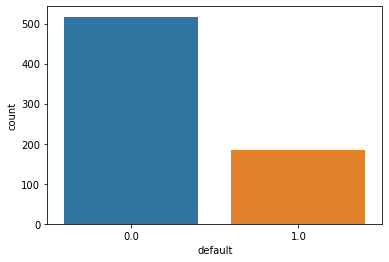

In [13]:
sns.countplot(x='default', data=df)
# A chaeck of the target colums shows the distribution is not balanced, this would be addressed to ensure the model is not porrly trained.

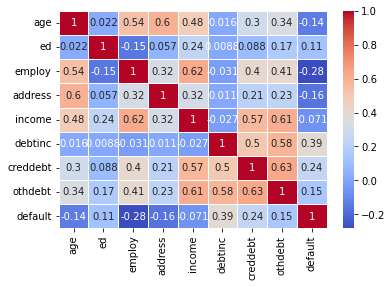

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## Outlier Detection using Boxplot

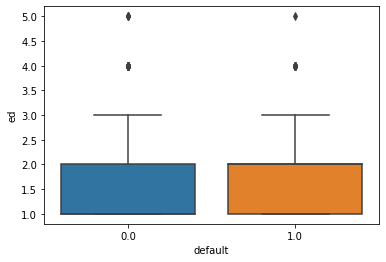

In [15]:
sns.boxplot(x='default', y='ed', data=df)
plt.show()

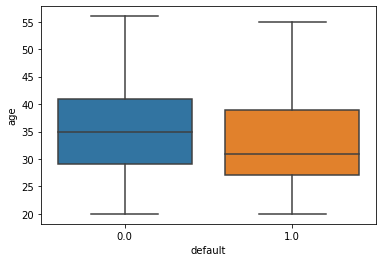

In [16]:
sns.boxplot(x='default', y='age', data=df)
plt.show()

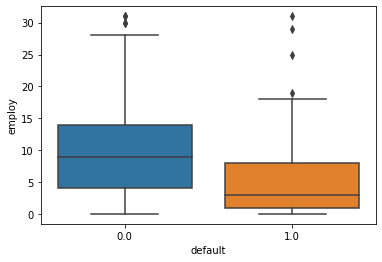

In [17]:
sns.boxplot(x='default', y='employ', data=df)
plt.show()

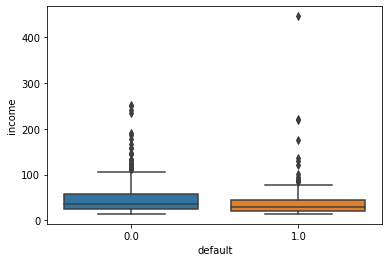

In [18]:
sns.boxplot(x='default', y='income', data=df)
plt.show()

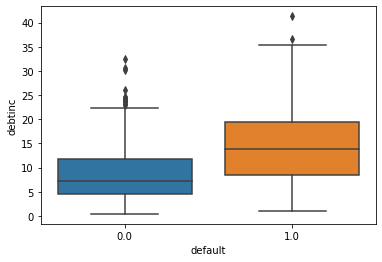

In [19]:
sns.boxplot(x='default', y='debtinc', data=df)
plt.show()

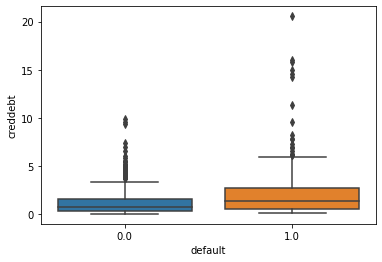

In [20]:
sns.boxplot(x='default', y='creddebt', data=df)
plt.show()

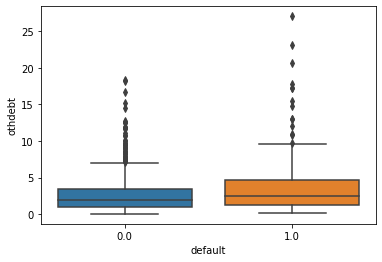

In [21]:
sns.boxplot(x='default', y='othdebt', data=df)
plt.show()

## Detecting and Removing Outliers using IQR

In [22]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [23]:
#age
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
Q1, Q3

(29.0, 40.0)

In [24]:
IQR = Q3 - Q1
IQR

11.0

In [25]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(12.5, 56.5)

In [26]:
df[(df.age<lower_limit)|(df.age>upper_limit)]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default


### Outlier in column 'ed'

In [27]:
#ed
Q1_ed = df.ed.quantile(0.25)
Q3_ed = df.ed.quantile(0.75)
Q1_ed, Q3_ed

(1.0, 2.0)

In [28]:
IQR_ed = Q3_ed - Q1_ed
IQR_ed

1.0

In [29]:
lower_limit_ed = Q1_ed - 1.5*IQR_ed
upper_limit_ed = Q3_ed + 1.5*IQR_ed
lower_limit_ed, upper_limit_ed

(-0.5, 3.5)

In [30]:
#Outliers in 'ed' column
df.ed[(df.ed<lower_limit_ed)|(df.ed>upper_limit_ed)].unique()

array([4, 5], dtype=int64)

#### Removing outliers

In [31]:
df= df[(df.ed>lower_limit_ed)&(df.ed<upper_limit_ed)]
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [32]:
df.ed.unique()

array([3, 1, 2], dtype=int64)

### Outlier in 'employ' column

In [33]:
#ed
Q1_employ = df.employ.quantile(0.25)
Q3_employ = df.employ.quantile(0.75)
Q1_employ, Q3_employ

(3.0, 13.0)

In [34]:
IQR_employ = Q3_employ - Q1_employ
IQR_employ

10.0

In [35]:
lower_limit_employ = Q1_employ - 1.5*IQR_employ
upper_limit_employ = Q3_employ + 1.5*IQR_employ
lower_limit_employ, upper_limit_employ

(-12.0, 28.0)

In [36]:
#Outliers in 'employ' column
df.employ[(df.employ<lower_limit_employ)|(df.employ>upper_limit_employ)].unique()

array([29, 31, 30], dtype=int64)

#### Removing outliers

In [37]:
df= df[(df.employ>lower_limit_employ)&(df.employ<upper_limit_employ)]
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [38]:
df.employ.unique()

array([17, 10, 15,  2,  5, 20, 12,  3,  0,  4, 24,  6, 22,  9, 13, 23,  8,
        1, 25,  7, 19, 18, 16, 11, 26, 14, 21, 27], dtype=int64)

### Outliers in 'income' column

In [39]:
#income
Q1_income = df.income.quantile(0.25)
Q3_income = df.income.quantile(0.75)
Q1_income, Q3_income

(24.0, 53.0)

In [40]:
IQR_income = Q3_income - Q1_income
IQR_income

29.0

In [41]:
lower_limit_income = Q1_income - 1.5*IQR_income
upper_limit_income = Q3_income + 1.5*IQR_income
lower_limit_income, upper_limit_income

(-19.5, 96.5)

In [42]:
#Outliers in 'employ' column
df.income[(df.income<lower_limit_income)|(df.income>upper_limit_income)].unique()

array([176, 120, 100, 113, 121, 135, 102, 116, 145, 118,  98, 144, 105,
       159, 220,  99, 101, 132, 157, 242, 221, 166, 115, 114, 129],
      dtype=int64)

#### Based on judgement , there could be exceptional income earners suh as high ranking officers of organizations, so it will be difficult to designate any as an outlier.

In [43]:
df.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [44]:
df.shape

(650, 9)

### Imbalanced Dataset

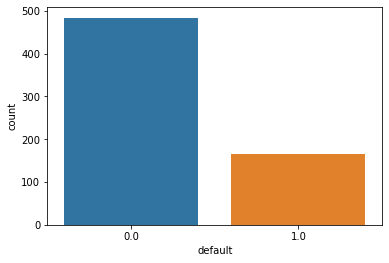

In [45]:
# Plot the number of 1's and 0's
sns.countplot(x='default',data=df); # To be treated as imbalance data set

### Upsampling the minority class

In [46]:
print("No of 1's:{}".format(df.default[df.default==1].count()))
print("No of 0's:{}".format(df.default[df.default==0].count()))

No of 1's:166
No of 0's:484


In [47]:
# Resample minority class to equal majority class
from sklearn.utils import resample
minority=df[df.default==1]
majority=df[df.default==0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
#df_2 = np.vstack((majority, minority_upsampled))
df_2=pd.concat([majority,minority_upsampled],axis=0)

In [48]:
print("No of 1's:{}".format(df_2.default[df_2.default==1].count()))
print("No of 0's:{}".format(df_2.default[df_2.default==0].count()))

No of 1's:484
No of 0's:484


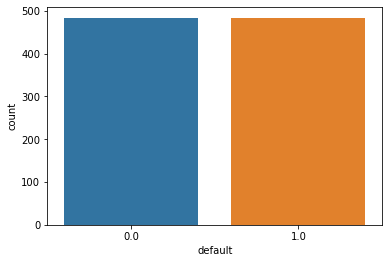

In [49]:
# Plot the number of 1's and 0's to confirm target features are now balanced
sns.countplot(x='default',data=df_2); # To be treated as imbalance data set

In [50]:
X=df_2.drop(['default'],axis=1)
y=df_2.default

### Data Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [52]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

In [53]:
# Fit and transform the data
X_transform= scaler.fit_transform(X)

In [54]:
X_transform

array([[0.19444444, 0.        , 0.37037037, ..., 0.41320293, 0.08558296,
        0.1715285 ],
       [0.55555556, 0.        , 0.55555556, ..., 0.12469438, 0.05350917,
        0.0920844 ],
       [0.58333333, 0.        , 0.55555556, ..., 0.06112469, 0.16774465,
        0.03364015],
       ...,
       [0.        , 0.        , 0.14814815, ..., 0.22738386, 0.01199538,
        0.04820024],
       [0.75      , 0.5       , 0.14814815, ..., 0.16381418, 0.07498276,
        0.04781227],
       [0.25      , 0.        , 0.25925926, ..., 0.47432763, 0.06299993,
        0.12613823]])

### Machine Learning  Base Model; Random Forest Classifier

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [58]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        96
         1.0       0.93      0.93      0.93        98

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194



In [59]:
# Display classification report for more detailed metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        96
         1.0       0.93      0.93      0.93        98

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194

Confusion Matrix:
 [[89  7]
 [ 7 91]]


### Hyperparameter Optimisation 

In [60]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a Random Forest Classifier
rf_classifier2 = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_classifier2,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,       # Number of folds in cross-validation
    scoring='accuracy',
    random_state=42
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.91


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create a Random Forest Classifier
rf_classifier3 = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier3, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.91


### Saving Model for deployment

In [62]:
# Save the trained model to a PKL file
import pickle
with open('defaultrisk_predictor.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

### Calling Model for Prediction

In [63]:
# Load the saved model from the PKL file
with open('defaultrisk_predictore.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model for predictions
loaded_y_pred = loaded_model.predict(X_test)
loaded_y_pred

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0.])